<a href="https://colab.research.google.com/github/yohanesnuwara/computational-geophysics/blob/master/seismic/seis_attribute_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attribute calculation of 3D seismic data

Notebook to demonstrate calculation of seismic attribute. Here, the Envelope attribute is calculated from a 3D seismic data in F3, Netherlands.

**Author:** Yohanes Nuwara

In [1]:
# Install, import packages, and clone repositories
import numpy as np
import matplotlib.pyplot as plt

!pip install segyio
import segyio
import sys

!git clone https://github.com/yohanesnuwara/d2geo
sys.path.append('/content/d2geo/attributes')

!git clone https://github.com/yohanesnuwara/computational-geophysics
sys.path.append('/content/computational-geophysics/seismic')

from seis_attribute import compute_attribute, display_attribute
from seistool import openSegy3D

     |████████████████████████████████| 92kB 3.7MB/s 
Cloning into 'd2geo'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 112 (delta 26), reused 14 (delta 0), pack-reused 52
Receiving objects: 100% (112/112), 52.57 KiB | 5.26 MiB/s, done.
Resolving deltas: 100% (52/52), done.
Cloning into 'computational-geophysics'...
remote: Enumerating objects: 434, done.
remote: Counting objects: 100% (197/197), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 434 (delta 125), reused 0 (delta 0), pack-reused 237
Receiving objects: 100% (434/434), 35.23 MiB | 21.63 MiB/s, done.
Resolving deltas: 100% (246/246), done.


In [2]:
# Get access to data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read Data 3D

In [3]:
filename = '/content/drive/My Drive/Public geoscience Data/Dutch F3 seismic data/Dutch Government_F3_entire_8bit seismic.segy'

# Read Segy
cube = openSegy3D(filename)

Successfully read 

Inline range from 100 to 750
Crossline range from 300 to 1250
TWT from 4.0 to 1848.0
Sample rate: 4.0 ms
Survey rotation: 1.54 deg


In [4]:
# Retrieve amplitude data, inlines, xlines, and TWT
data = cube.data
inlines, crosslines, twt = cube.inlines, cube.crosslines, cube.twt

print(data)

[[[    0.     0.     0. ...  -685.  -569.     0.]
  [    0.     0.     0. ... -2683. -2175.   774.]
  [    0.     0.     0. ... -1588. -1499.   473.]
  ...
  [    0.     0.     0. ...  -971.  -832. -1247.]
  [    0.     0.     0. ... -1702. -1506. -1023.]
  [    0.     0.     0. ... -2689. -1088.   -31.]]

 [[    0.     0.     0. ...  -460.  -428.  1457.]
  [    0.     0.     0. ...    99. -1130.  -275.]
  [    0.     0.     0. ...  -635.  -609.  1149.]
  ...
  [    0.     0.     0. ...   -86. -1462. -2220.]
  [    0.     0.     0. ... -1173. -1277. -1643.]
  [    0.     0.     0. ... -1783. -1278.  -685.]]

 [[    0.     0.     0. ... -1178. -1158.  1350.]
  [    0.     0.     0. ...  -900.  -641.  1392.]
  [    0.     0.     0. ...  -790. -1096.  1002.]
  ...
  [    0.     0.     0. ...   -92.  -795. -2519.]
  [    0.     0.     0. ... -1199. -1624. -1742.]
  [    0.     0.     0. ... -2197. -1272.  -977.]]

 ...

 [[    0.     0.     0. ...     0.     0.     0.]
  [    0.     0.    

## Seismic attribute calculation (output 2D)

### Inline 400

In [5]:
result = compute_attribute(cube=data, output='2d', type='il', inline_loc=400, 
                           inline_array=inlines, attribute_class='CompleTrace', 
                           attribute_type='enve')
result

dask.array<_trim, shape=(1, 462, 951), dtype=float32, chunksize=(1, 461, 461), chunktype=numpy.ndarray>

In [6]:
print(result.compute())

[[[    0.             0.             0.         ...     0.
       0.             0.        ]
  [    0.             0.             0.         ...     0.
       0.             0.        ]
  [    0.             0.             0.         ...     0.
       0.             0.        ]
  ...
  [ 4081.42793841  3642.33063741  5020.68176622 ...   868.32586268
    1311.81807593  2581.62098775]
  [ 3632.94830919  3015.60257597  4200.62339966 ...  7762.17489576
    8733.38656827  6866.16492601]
  [ 3102.82431564  3665.49899391  4609.04510984 ...  8758.36004162
    9777.06509977 10052.00580439]]]


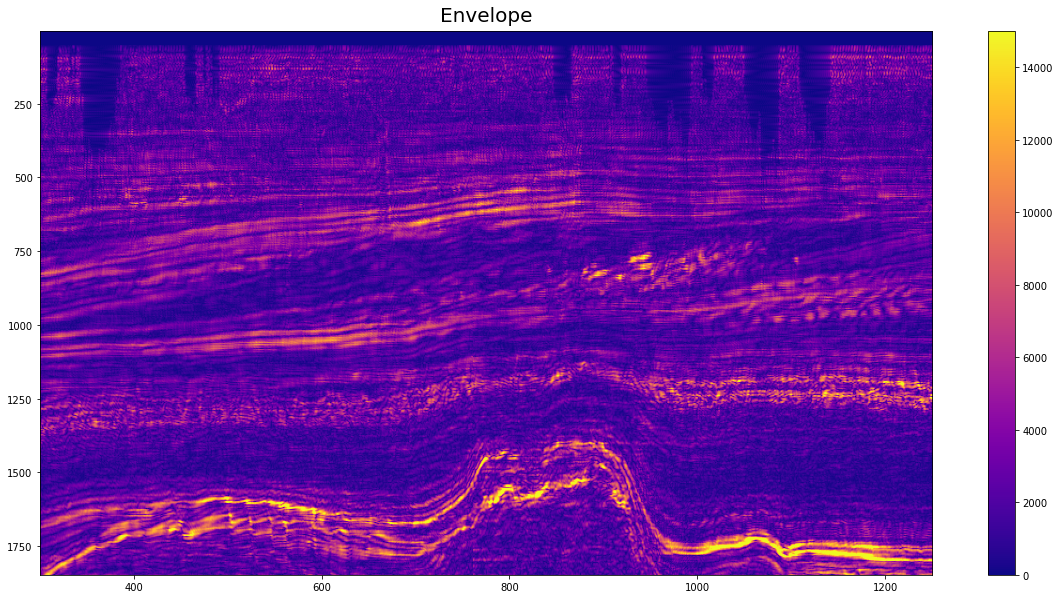

In [7]:
plt.figure(figsize=(20,10))
display_attribute(result, 'il', crosslines, twt, 'plasma', vmin=0, vmax=15000)
plt.title('Envelope', size=20, pad=10)
plt.show()

### Crossline 1200


In [8]:
result = compute_attribute(cube=data, output='2d', type='xl', xline_loc=1200, 
                           xline_array=crosslines, attribute_class='CompleTrace', 
                           attribute_type='enve')
result

dask.array<_trim, shape=(1, 462, 651), dtype=float32, chunksize=(1, 461, 461), chunktype=numpy.ndarray>

In [9]:
print(result.compute())

[[[   0.            0.            0.         ...    0.
      0.            0.        ]
  [   0.            0.            0.         ...    0.
      0.            0.        ]
  [   0.            0.            0.         ...    0.
      0.            0.        ]
  ...
  [ 975.09941888  634.21308568 1180.10990037 ...  674.91567114
    748.50402745  701.03113757]
  [ 709.86535957  652.62220706 1159.95273385 ...  541.25677304
    549.73494104  555.96306954]
  [ 543.30156556 1512.78546278 1399.24956086 ...   53.17972965
     43.17140234   28.30421095]]]


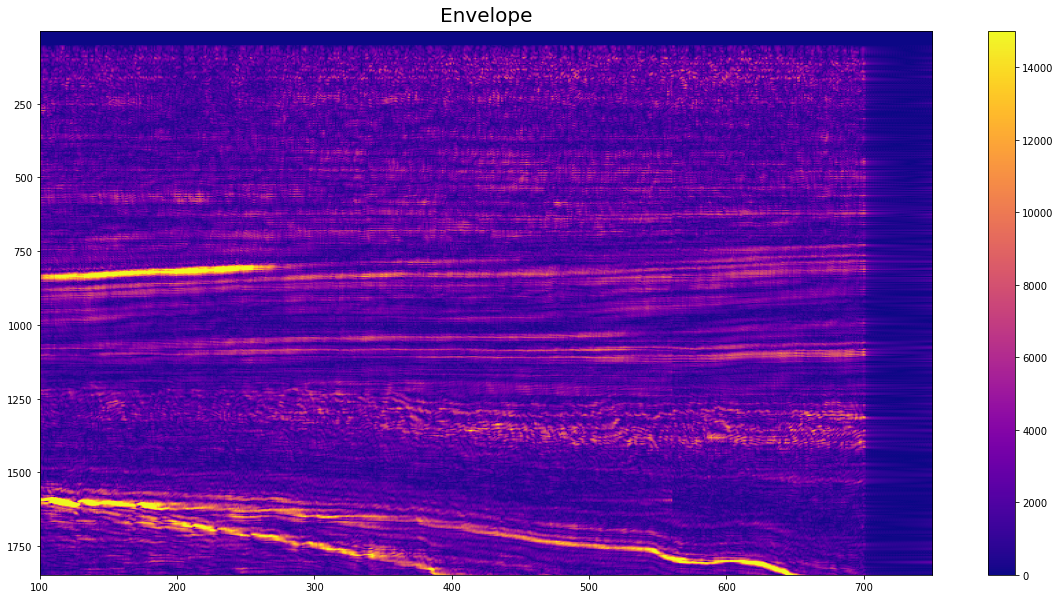

In [10]:
plt.figure(figsize=(20,10))
display_attribute(result, 'xl', inlines, twt, 'plasma', vmin=0, vmax=15000)
plt.title('Envelope', size=20, pad=10)
plt.show()

### Timeslice 1624 ms

In [11]:
result = compute_attribute(cube=data, output='2d', type='ts', timeslice_loc=1624, 
                           timeslice_array=twt, attribute_class='CompleTrace', 
                           attribute_type='enve')
result

dask.array<_trim, shape=(1, 651, 951), dtype=float32, chunksize=(1, 650, 650), chunktype=numpy.ndarray>

In [12]:
print(result.compute())

[[[1418.58187406 2552.2550099  3457.60647592 ... 3919.66558862
   2564.54050117  773.49096203]
  [ 878.25643425 2364.95304464 3138.9514801  ... 3844.98053554
   2941.02497841 1782.49827168]
  [2636.72824212 4071.20817738 5066.66059081 ... 2861.02873143
   2172.91506067 1866.10449769]
  ...
  [ 172.14832776  193.08161352  171.33928492 ... 1618.73305045
   2743.53063943 1595.71065293]
  [ 136.97994982  322.45079389  148.99673701 ... 2840.95609096
    178.44815105 3430.64276868]
  [   5.19284564   90.92640902   13.5494993  ... 3269.5799729
   2341.40162856 2550.77315148]]]


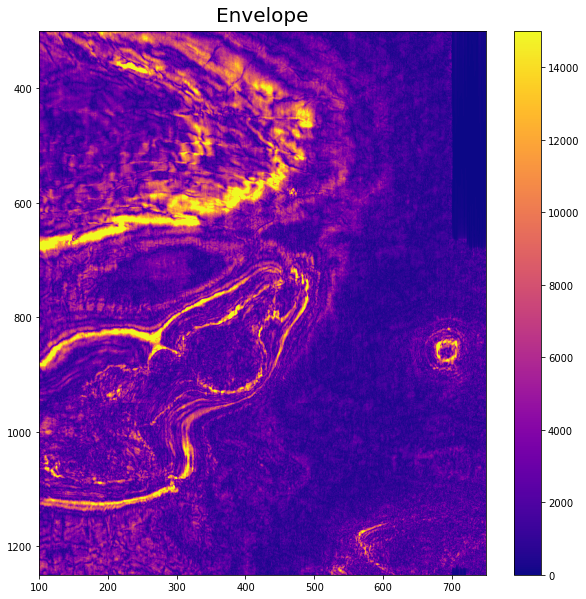

In [13]:
plt.figure(figsize=(10,10))
display_attribute(result, 'ts', inlines, crosslines, 'plasma', vmin=0, vmax=15000)
plt.title('Envelope', size=20, pad=10)
plt.show()

# Seismic attribute calculation (output 3D)

In [14]:
result = compute_attribute(cube=data, output='3d', type='il', inline_loc=400, 
                           attribute_class='CompleTrace', attribute_type='enve')
result

dask.array<_trim, shape=(651, 951, 462), dtype=float32, chunksize=(304, 304, 462), chunktype=numpy.ndarray>